Dante Gino Silva Santis
https://github.com/danteginos/Mis_Proyectos

#### Aplicación Práctica

Para consolidar tus conocimientos, realiza la siguiente actividad práctica:

Cargar y Limpiar el Dataset: Utiliza un dataset de Kaggle relacionado con ventas, salud o cualquier otro tema de interés.
Calcular las Correlaciones: Calcula las correlaciones de Pearson, Spearman y Kendall entre las variables del dataset.
Crear Mapas de Calor: Crea mapas de calor para cada tipo de correlación y analiza las relaciones entre las variables.
Interpretar los Resultados: Escribe un breve informe sobre las correlaciones encontradas y cómo pueden influir en el análisis de datos y la toma de decisiones.


Ejemplo de Dataset

Puedes utilizar el siguiente dataset para esta actividad: World Happiness Report.

In [ ]:
# Se usa biblioteca de google
from google.colab import drive
# Se conecta colab con drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Cargar el dataset
path=''
df = pd.read_csv('/content/drive/MyDrive/DATA/World-happiness-report-2024.csv')

In [ ]:
# Se verifica las primeras filas del dataframe
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [ ]:
#  Se ve la informacion de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


#### La información de columnas muestra que existen 3 datos nulos en cada una de las 7 columnas de tipo float.

In [ ]:
# Se muestras las estadistica de las columnas numericas
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [ ]:
# Se stanariza los nombres de columnas
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [ ]:
df.columns

Index(['country_name', 'regional_indicator', 'ladder_score', 'upperwhisker',
       'lowerwhisker', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia_+_residual'],
      dtype='object')

In [ ]:
# Se reviza la columna de  Nombres de paises
df["country_name"].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Bahrain',
       'Croatia', 'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica',
       'Peru', 'Dominican Republic', 'Mauritius', 'Moldova', 'Russia',
       'Boli

In [ ]:
# Se reviza la columna Indicador e regiones
df["regional_indicator"].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [ ]:
# Se verifica valores duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(143, 12)

#### No se encuentra datos duplicados

In [ ]:
# Se revisa las columnas con datos nulos
df["log_gdp_per_capita"].isna()

,log_gdp_per_capita
0,False
1,False
2,False
3,False
4,False
...,...
138,False
139,False
140,False
141,False


#### No se encuentran datos nulos, pero el total de filas es 143, entonces se supone que los datos puedan ser falsos nulos.

In [ ]:
df[df["log_gdp_per_capita"] == "NaN"]

,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual


In [ ]:
# Se identificara valores "Falsos nulos" comunes
falsos_nulos = df["log_gdp_per_capita"].isin(['',' ', 'NA', 'NAN', 'null', 'NULL', '?', '-', 'n/a'])
print(f"Falsos nulos: {falsos_nulos.sum()}")

Falsos nulos: 0


In [ ]:
# Se cambia a tipo string a posibles falsos nulos
filas_sospechosas = df[df["log_gdp_per_capita"].astype(str).str.strip().isin(['', 'nan', 'NA'])]
print(filas_sospechosas[["log_gdp_per_capita"]].head(10))

     log_gdp_per_capita
61                  NaN
87                  NaN
102                 NaN


In [ ]:
# Se muestran las columnas con Nulos
filas = df.iloc[[61, 87, 102]]
print(filas)

           country_name                  regional_indicator  ladder_score  \
61              Bahrain        Middle East and North Africa         5.959   
87           Tajikistan  Commonwealth of Independent States         5.281   
102  State of Palestine        Middle East and North Africa         4.879   

     upperwhisker  lowerwhisker  log_gdp_per_capita  social_support  \
61          6.153         5.766                 NaN             NaN   
87          5.361         5.201                 NaN             NaN   
102         5.006         4.753                 NaN             NaN   

     healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
61                       NaN                           NaN         NaN   
87                       NaN                           NaN         NaN   
102                      NaN                           NaN         NaN   

     perceptions_of_corruption  dystopia_+_residual  
61                         NaN                  NaN  
8

#### Se encuentras los registros correpondiente a tres paises diferentes

In [ ]:
df[df["country_name"] == 'Bahrain']

,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df["regional_indicator"] == 'Middle East and North Africa'].head(10)

,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,Middle East and North Africa,6.951,7.060,6.843,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,Middle East and North Africa,6.733,6.823,6.643,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,Middle East and North Africa,6.594,6.707,6.480,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Libya,Middle East and North Africa,5.866,5.987,5.746,1.526,1.100,0.550,0.592,0.111,0.204,1.785
84,Algeria,Middle East and North Africa,5.364,5.476,5.251,1.324,1.191,0.568,0.247,0.091,0.200,1.743
91,Iraq,Middle East and North Africa,5.166,5.283,5.049,1.249,0.996,0.498,0.425,0.141,0.048,1.809
97,Turkiye,Middle East and North Africa,4.975,5.085,4.866,1.702,1.175,0.631,0.202,0.068,0.115,1.083
99,Iran,Middle East and North Africa,4.923,5.024,4.822,1.435,1.136,0.571,0.366,0.235,0.123,1.057


#### Se determina aplicar el valor promedio de cada columna dentro de la misma region, a los paises que tienen valores nulos, pues se supone que tienen estadisticas similares, para el pais 'Bahrain' y 'State of Palestine'.

In [ ]:
df_fil = df[df["regional_indicator"] == 'Middle East and North Africa']
df_fil["healthy_life_expectancy"].unique()

array([0.74 , 0.661, 0.563, 0.511,   nan, 0.55 , 0.568, 0.498, 0.631,
       0.571, 0.495, 0.579, 0.594, 0.488, 0.293, 0.556])

#### Por ejemplo la esperanza de vida en la region varia de 0.2 a 0.7 y valor entre 0.5 que mas se repiten.

In [ ]:
#### se reemplazan los valores nulos de  'Bahrain' y 'State of Palestine' con el promedio respectivo de cada columna
# Se completa el valor.
pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["log_gdp_per_capita"].mean()
df["log_gdp_per_capita"] = df["log_gdp_per_capita"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["social_support"].mean()
df["social_support"] = df["social_support"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["healthy_life_expectancy"].mean()
df["healthy_life_expectancy"] = df["healthy_life_expectancy"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["freedom_to_make_life_choices"].mean()
df["freedom_to_make_life_choices"] = df["freedom_to_make_life_choices"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["generosity"].mean()
df["generosity"] = df["generosity"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["perceptions_of_corruption"].mean()
df["perceptions_of_corruption"] = df["perceptions_of_corruption"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Middle East and North Africa"]["dystopia_+_residual"].mean()
df["dystopia_+_residual"] = df["dystopia_+_residual"].fillna(pmp)



In [ ]:
df[df["country_name"] == 'Bahrain']

,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,1.460533,1.0842,0.5532,0.493667,0.108,0.146067,1.325067


In [ ]:
df[df["country_name"] == 'State of Palestine']

,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,1.460533,1.0842,0.5532,0.493667,0.108,0.146067,1.325067


In [ ]:
# Se reviza el pais de Tajikistan con region 'Commonwealth of Independent States'
df[df["regional_indicator"] == 'Commonwealth of Independent States'].head(10)


,country_name,regional_indicator,ladder_score,upperwhisker,lowerwhisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_+_residual
46,Uzbekistan,Commonwealth of Independent States,6.195,6.303,6.087,1.212000,1.3940,0.5390,0.835000,0.251,0.215000,1.749000
48,Kazakhstan,Commonwealth of Independent States,6.188,6.278,6.097,1.622000,1.4570,0.5560,0.733000,0.149,0.120000,1.551000
70,Moldova,Commonwealth of Independent States,5.816,5.930,5.702,1.385000,1.2770,0.5420,0.695000,0.077,0.044000,1.795000
71,Russia,Commonwealth of Independent States,5.785,5.859,5.712,1.642000,1.3510,0.5310,0.551000,0.138,0.121000,1.451000
74,Kyrgyzstan,Commonwealth of Independent States,5.714,5.795,5.632,1.054000,1.4770,0.5880,0.834000,0.225,0.030000,1.505000
81,Armenia,Commonwealth of Independent States,5.455,5.560,5.350,1.444000,1.1540,0.6030,0.650000,0.051,0.173000,1.379000
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,1.460533,1.0842,0.5532,0.493667,0.108,0.146067,1.325067
90,Georgia,Commonwealth of Independent States,5.185,5.283,5.087,1.467000,0.9900,0.5240,0.680000,0.000,0.174000,1.349000
100,Azerbaijan,Commonwealth of Independent States,4.893,5.018,4.768,1.433000,0.8760,0.4960,0.668000,0.112,0.199000,1.110000
104,Ukraine,Commonwealth of Independent States,4.873,4.988,4.758,1.350000,1.3150,0.5130,0.631000,0.285,0.025000,0.753000


#### Como existen vario paises de la misma region del pais que tiene datos nulos, y observando que los datos son similares, se aplica el mismo criterio de la limpieza anterior, colocando el promedio de cada columna. Ademas los datos nulos corresponden a las mismas columnas.

In [ ]:
#### se reemplazan los valores nulos de  'Bahrain' y 'State of Palestine' con el promedio respectivo de cada columna
# Se completa el valor.
pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["log_gdp_per_capita"].mean()
df["log_gdp_per_capita"] = df["log_gdp_per_capita"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["social_support"].mean()
df["social_support"] = df["social_support"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["healthy_life_expectancy"].mean()
df["healthy_life_expectancy"] = df["healthy_life_expectancy"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["freedom_to_make_life_choices"].mean()
df["freedom_to_make_life_choices"] = df["freedom_to_make_life_choices"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["generosity"].mean()
df["generosity"] = df["generosity"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["perceptions_of_corruption"].mean()
df["perceptions_of_corruption"] = df["perceptions_of_corruption"].fillna(pmp)

pmp = df[df["regional_indicator"] == "Commonwealth of Independent States"]["dystopia_+_residual"].mean()
df["dystopia_+_residual"] = df["dystopia_+_residual"].fillna(pmp)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  143 non-null    object 
 1   regional_indicator            143 non-null    object 
 2   ladder_score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   log_gdp_per_capita            143 non-null    float64
 6   social_support                143 non-null    float64
 7   healthy_life_expectancy       143 non-null    float64
 8   freedom_to_make_life_choices  143 non-null    float64
 9   generosity                    143 non-null    float64
 10  perceptions_of_corruption     143 non-null    float64
 11  dystopia_+_residual           143 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


#### Terminado el proceso de limpieza de los datos, se pasa al siguiente requirimiento.

 #### Calcular las Correlaciones:

 * Calcula las correlaciones de Pearson, Spearman y Kendall entre las variables del dataset.

In [ ]:
# Calcular las correlaciones de Pearson
# Se debe filtrar solo las columnas numericas

df_numericas =df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

                              ladder_score  upperwhisker  lowerwhisker  \
ladder_score                      1.000000      0.999678      0.999697   
upperwhisker                      0.999678      1.000000      0.998750   
lowerwhisker                      0.999697      0.998750      1.000000   
log_gdp_per_capita                0.766340      0.759530      0.772450   
social_support                    0.812372      0.810133      0.814029   
healthy_life_expectancy           0.757493      0.748772      0.765415   
freedom_to_make_life_choices      0.641422      0.642847      0.639648   
generosity                        0.130909      0.130269      0.131502   
perceptions_of_corruption         0.451212      0.448103      0.453969   
dystopia_+_residual               0.532716      0.541116      0.524273   

                              log_gdp_per_capita  social_support  \
ladder_score                            0.766340        0.812372   
upperwhisker                            0.759530 

In [ ]:
# Calcular las correlaciones de  Spearman
spearman_corr = df_numericas.corr(method='spearman')
print (spearman_corr)

                              ladder_score  upperwhisker  lowerwhisker  \
ladder_score                      1.000000      0.999405      0.999389   
upperwhisker                      0.999405      1.000000      0.998178   
lowerwhisker                      0.999389      0.998178      1.000000   
log_gdp_per_capita                0.822775      0.816908      0.828121   
social_support                    0.821749      0.816739      0.827171   
healthy_life_expectancy           0.772646      0.765805      0.776523   
freedom_to_make_life_choices      0.634071      0.633305      0.631090   
generosity                        0.149551      0.147560      0.149815   
perceptions_of_corruption         0.395807      0.396653      0.395081   
dystopia_+_residual               0.437991      0.445241      0.429744   

                              log_gdp_per_capita  social_support  \
ladder_score                            0.822775        0.821749   
upperwhisker                            0.816908 

In [ ]:
# Calcular las correlaciones de Kendall
kendall_corr = df_numericas.corr(method='kendall')
print(kendall_corr)

                              ladder_score  upperwhisker  lowerwhisker  \
ladder_score                      1.000000      0.987291      0.985514   
upperwhisker                      0.987291      1.000000      0.972507   
lowerwhisker                      0.985514      0.972507      1.000000   
log_gdp_per_capita                0.630236      0.625111      0.637851   
social_support                    0.618646      0.612730      0.625869   
healthy_life_expectancy           0.572472      0.565370      0.577123   
freedom_to_make_life_choices      0.460606      0.461592      0.457343   
generosity                        0.098298      0.097706      0.097133   
perceptions_of_corruption         0.271436      0.271436      0.272476   
dystopia_+_residual               0.308481      0.313014      0.301247   

                              log_gdp_per_capita  social_support  \
ladder_score                            0.630236        0.618646   
upperwhisker                            0.625111 

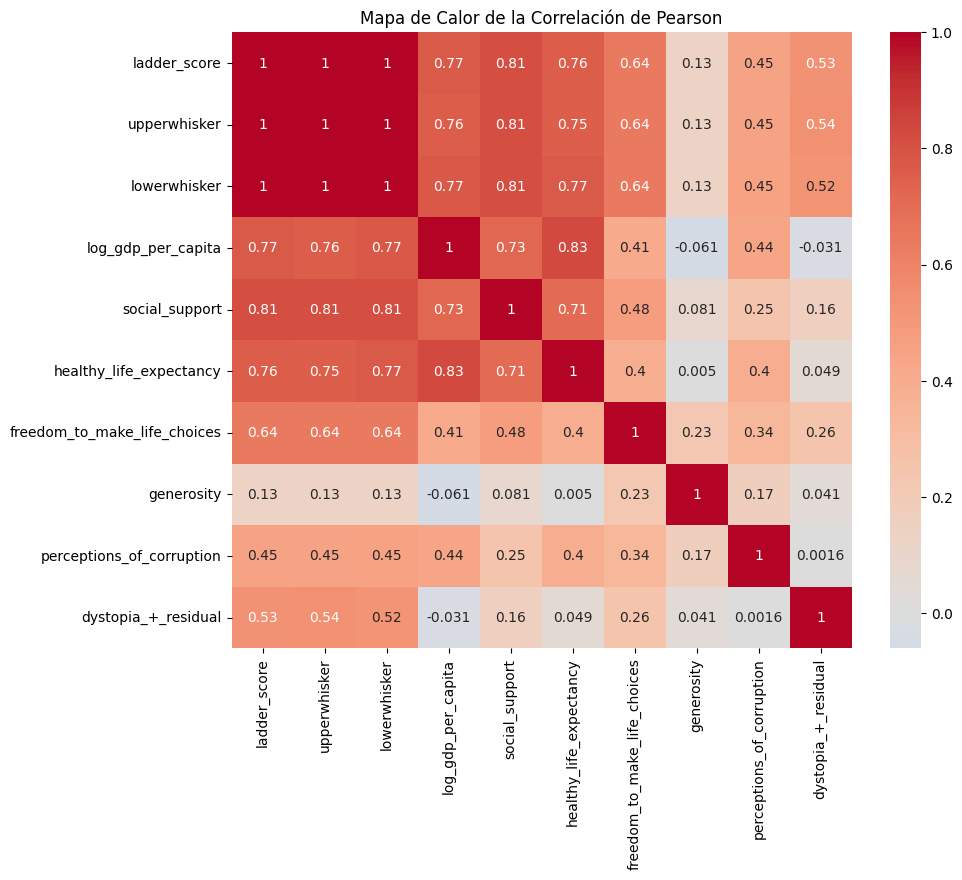

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

 La matriz de correlación muestra las correlaciones de Pearson entre diferentes variables relacionadas con el informe de felicidad.

  #### Correlaciones extremadamente fuertes:
 * ladder_score con upperwhisker:(1) El indice de felicidad y su margen de error son identicos.
 * social_support con ladder_score(0.81): El apoyo social es el principal predictor de felicidad.
 * log_gdp_per_capita con healthy_life_expectancy(0.83): A mayor PIB más alta es la esperanza de vida.
 * log_gpd_per_capita con ladder_score(0.77): Riqueza economica acompañada de felicidad.

 #### Correlaciones fuertes:
 * freedom_to_make_choices  con ladder_score(0.64): La autonomia personal contribuye a la felicidad.
 * healthy_life_expectancy con social_support(0.71): Apoyo social vidas mas largas.

 #### Correlaciones moderadas:
 *perceptions_of_corruption con ladder_score(0.45): La corrupcion reduce la felicidad.
 *freedom_to_make_choices con social_support(0.48): La sociedades con apoyo social facilitan la libertad.

 #### Otras relaciones son irrelevantes.




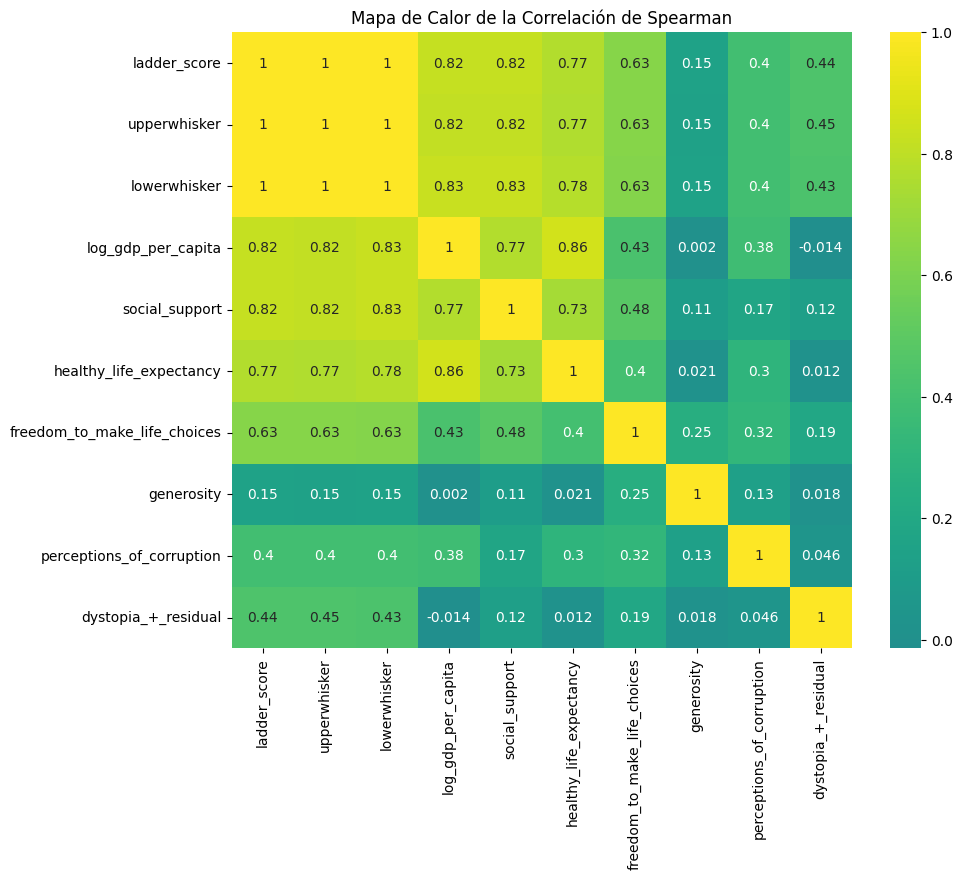

In [ ]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

 La matriz de correlación muestra las correlaciones de Spearman entre diferentes variables relacionadas con el informe de felicidad.

  La matriz de correlación es simetrica, las correlaciones por encima y por debajo de la diagonal son iguales.

#### ladder_score tiene fuertes correlaciones positivas con:

* upperwhisker (1) y lowerwhisker (1): esto es porque son los limites del intervalo de confianzad de ladder_score.

* social_support (0.82) : El apoyo social esta muy relacionado con la felicidad.

* log_gdp_per_capita(0.82) y healthy_life_expectancy(0.77):
El nivel economico y la esperanza de vida, estan fuertemente relacionados.

#### log_gdp_per_capita(PIB)  teiene fuerte correlaciones con :

* healthy_life_expectancy (0.86): Los paises con mayor PIB tienden a tener mayor esperanza de vida saludable.

#### social_support tiene fuertes correlaciones con:
healthy_life_expectancy (0.73): El apoyo social se relaciona con una mayor esperanza de vida.

#### freedom_to_make_life_choices tiene una correlación moderada con ladder_score (0.63).

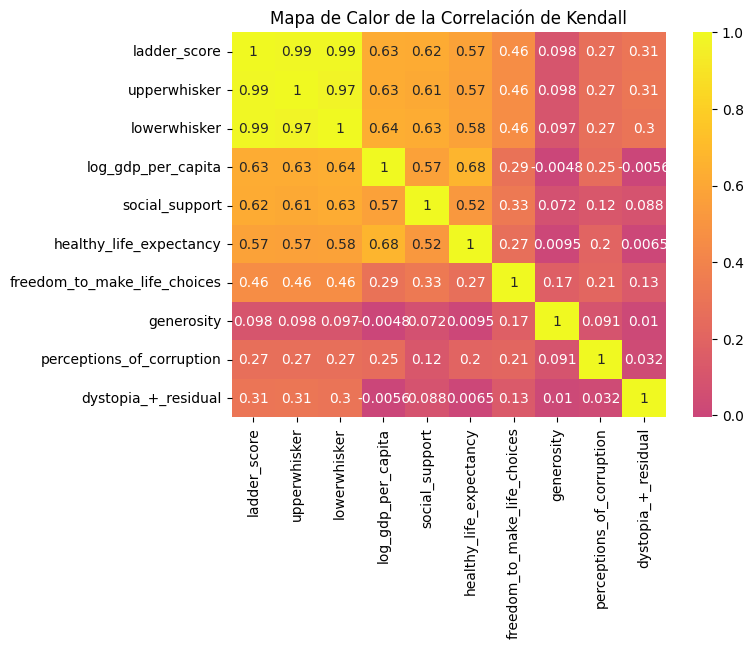

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

La matriz de correlación muestra las correlaciones de Kendall entre diferentes variables relacionadas con el informe de felicidad.

#### Correlaciones Fuertes:
* ladder_score esta altamente correlacionado con  upperwhisker y lowerwhisker(0.99) y social_support(0.62).
*log_gdp_per_capita(PIB) se relaciona fuertemente con healthy_life_expectancy(0.68).

#### Correlaciones debiles:
* generosity muestra baja correlacion con todas las variables(0.17).



### Interpretación de los Resultados

##### Se Analiza los tres Metodsos de  correlaciones y se identifica que no dan las mismas correlaciones, para cada columna, por ejemplo para la columna ladder_score comparada con la columna log_gdp_per_capita

* La correlación de Pearson es 0.766340  
* La correlación de Spearm  es 0.822775
* La correlación de Kendall  es 0.630236  

#### Estas pequeñas diferencias entre metodos no deberia afectar significativamente la interpretación de los mapas de calor.


#### Hallazgos:

* El apoyo social y la esperanza de vida son los principales auspiciadores de la felicidad, mientras que la generosidad y la corrupción percibida tienen impacto mínimo.

* El nivel economico y apoyo social influyen en la esperanza de vida y en la felicidad, mientras que la libertad para elegir no influye mucho.



